In [1]:
from disentangle.data_loader.raw_mrc_dloader import get_mrc_data
import os
ch1path = '/group/jug/ashesh/data/BioSR/F-actin/GT_all_a.mrc'
ch2path = '/group/jug/ashesh/data/BioSR/CCPs/GT_all.mrc'
ch3path ='/group/jug/ashesh/data/BioSR/ER/GT_all.mrc'
ch4path = '/group/jug/ashesh/data/BioSR/F-actin_Nonlinear/GT_all_a.mrc'
ch5path = '/group/jug/ashesh/data/BioSR/Microtubules/GT_all.mrc'

In [2]:
data1 = get_mrc_data(ch1path)
data2 = get_mrc_data(ch2path)
data3 = get_mrc_data(ch3path)
data4 = get_mrc_data(ch4path)
data5 = get_mrc_data(ch5path)

In [30]:
kernel_size = 200
scale_factor = 3
sigma = 1
qt_background = 0.5

img = data1[0]

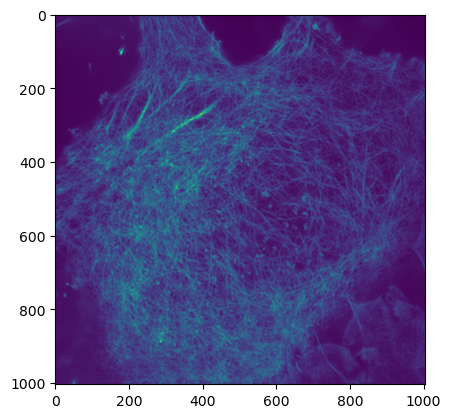

In [31]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(img)

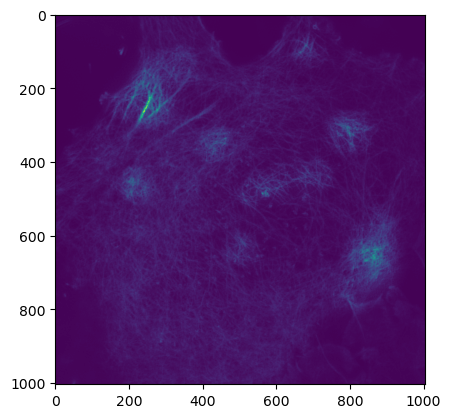

In [57]:
# from disentangle.data_loader.variable_intensity_augmentation import get_weight_mask
factor = get_weight_mask(img.shape, np.ones(img.shape), kernel_size = kernel_size, scale_factor = scale_factor, sigma = 0.8, qt_background = qt_background)
plt.imshow(factor*img)

In [32]:
np.quantile(img, [0, 0.1, 0.5, 0.9,1])

array([    0.,  2384.,  8986., 18633., 65535.])

In [33]:
val = np.quantile(img, qt_background)
mask = img > val

In [34]:
# _,ax = plt.subplots(figsize=(10,10),ncols=2,nrows=2)
# ax[0,0].imshow(img)
# ax[0,1].imshow(new_img)
# ax[1,0].imshow(img[400:800,400:800])
# ax[1,1].imshow(new_img[400:800,400:800])

In [35]:
# Importing Numpy package
import numpy as np

# sigma(standard deviation) and muu(mean) are the parameters of gaussian


def gaussuian_filter(kernel_size, sigma=1, muu=0):

	# Initializing value of x,y as grid of kernel size
	# in the range of kernel size

	x, y = np.meshgrid(np.linspace(-2, 2, kernel_size),
					np.linspace(-2, 2, kernel_size))
	dst = np.sqrt(x**2+y**2)

	# lower normal part of gaussian
	normal = 1/(np.sqrt(2.0 * np.pi) * sigma)

	# Calculating Gaussian filter
	gauss = np.exp(-((dst-muu)**2 / (2.0 * sigma**2))) * normal
	return gauss

gaussian = gaussuian_filter(kernel_size=kernel_size, sigma=sigma)
# [0,1]
gaussian = (gaussian - gaussian.min())/ gaussian.max()
# [0, scale_factor]
gaussian = gaussian * scale_factor
# [1,scale_factor+1]
# gaussian = gaussian + 1


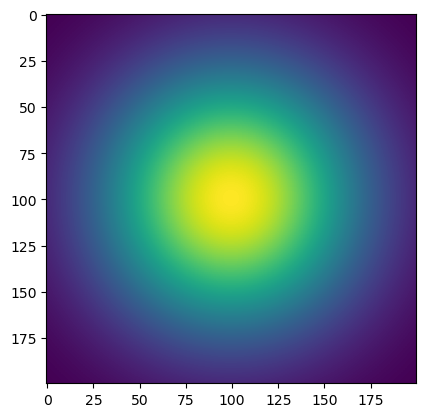

In [36]:
plt.imshow(gaussian)

In [45]:
np.mean(gaussian > 1.2)

0.339

322 684
433 853
873 494
495 543
105 775
212 743
236 394
287 726
656 797
390 583
838 822
711 677
544 533
894 776
892 427
870 154
277 418
124 348
281 749
262 774


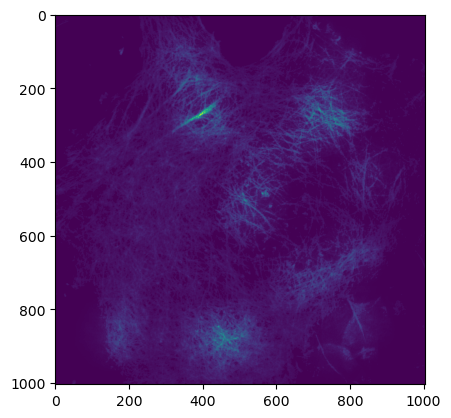

In [41]:
factor = np.zeros_like(img)
factor = factor + mask
for i in range(20):
    h = np.random.randint(0, img.shape[0] - kernel_size)
    w = np.random.randint(0, img.shape[1] - kernel_size)
    factor[h:h+kernel_size, w:w+kernel_size] += gaussian
    
    print(h+kernel_size//2,w+kernel_size//2)
plt.imshow(factor*img)

factor[factor ==0] = 1

In [38]:
factor.min()

0.00224259495068994

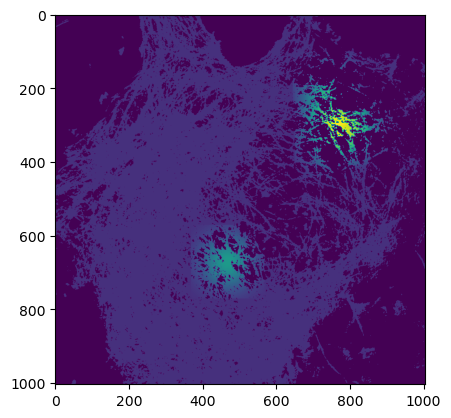

In [39]:
plt.imshow(mask*factor)